# Overview

This week we are going to learn a bit about __Data Visualization__, which is an important aspect in Computational Social Science. Why is it so important to make nice plots if we can use stats and modelling? I hope I will convince that it is _very_ important to make meaningful visualizations. Then, we will try to produce some beautiful figures using the data we downloaded last week. 

Here is the plan:

* __Part 1__: Some talking from me on __why do we even care about visualizing data__. 
* __Part 2__: Here is where you convince yourself that data visualization is useful by doing a __little visualization exercise__.
* __Part 3__: We will look at the relation between the attention to GME on Reddit and the evolution of the GME market indicators.
* __Part 4__: We will visualize the activity of Redditors posting about GME.


## Part 1: Intro to visualization

Start by watching this short introduction video to Data Visualization.
    

> * _Video Lecture_: [Intro to Data Visualization](https://www.youtube.com/watch?v=oLSdlg3PUO0)

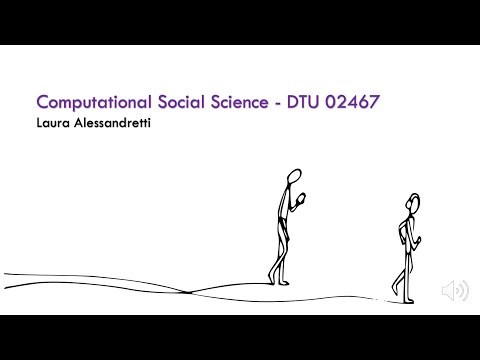

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("oLSdlg3PUO0",width=800, height=450)


There are many types of data visualizations, serving different purposes. Today we will look at some of those types for visualizing single variable data: _line graphs_ and _histograms_. We will also use _scatter plots_ two visualize two variables against each other. 
Before starting, read the following sections of the data visualization book.

> * _Reading_ [Sections 2,3.2 and 5 of the data visualization book](https://clauswilke.com/dataviz/aesthetic-mapping.html)

## Part 2: A little visualization exercise

Ok, but is data visualization really so necessary? Let's see if I can convince you of that with this little visualization exercise.


> *Exercise 1: Visualization vs stats*
> 
> Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
> Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
> * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).
> * Use [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is.


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

And the [video below](https://www.youtube.com/watch?v=DbJyPELmhJc) generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises.


In [113]:
import requests
### Download Data ###
for i in range(1,5):
    url = f'https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data{i}.tsv'
    r = requests.get(url, allow_redirects=True)
    open(f'data/data{i}.tsv', 'wb').write(r.content)

    
import pandas as pd
### Read Files to dataframes ###

data1 = pd.read_csv("data/data1.tsv", sep = "\t", header = None, names = ["X1", "Y1"])
data2 = pd.read_csv("data/data2.tsv", sep = "\t", header = None, names = ["X2", "Y2"])
data3 = pd.read_csv("data/data3.tsv", sep = "\t", header = None, names = ["X3", "Y3"])
data4 = pd.read_csv("data/data4.tsv", sep = "\t", header = None, names = ["X4", "Y4"])

In [71]:
### Get Mean Values ###
print("The mean values of data")
means = pd.concat([data1, data2, data3, data4], axis=1).mean(0).round(2).values.reshape(2,4)
pd.DataFrame(means, columns = ["Data1", "Data2", "Data3", "Data4"], index=["X", "Y"])

The mean values of data


,Data1,Data2,Data3,Data4
X,9.0,7.5,9.0,7.5
Y,9.0,7.5,9.0,7.5


In [72]:
### Get Variance ###
print("The variance of data")
means = pd.concat([data1, data2, data3, data4], axis=1).var(0).round(3).values.reshape(2,4)
pd.DataFrame(means, columns = ["Data1", "Data2", "Data3", "Data4"], index=["X", "Y"])

The variance of data


,Data1,Data2,Data3,Data4
X,11.0,4.127,11.0,4.128
Y,11.0,4.123,11.0,4.123


In [82]:
### Get Correlation ###

X = pd.concat([data1["X1"], data2["X2"], data3["X3"], data4["X4"]], axis=1)
Y = pd.concat([data1["Y1"], data2["Y2"], data3["Y3"], data4["Y4"]], axis=1)
XC = X.corr(method = "pearson").round(3)
YC = Y.corr(method = "pearson").round(3)
print(XC)
print(YC)

     X1   X2   X3   X4
X1  1.0  1.0  1.0 -0.5
X2  1.0  1.0  1.0 -0.5
X3  1.0  1.0  1.0 -0.5
X4 -0.5 -0.5 -0.5  1.0
       Y1     Y2     Y3     Y4
Y1  1.000  0.750  0.469 -0.489
Y2  0.750  1.000  0.588 -0.478
Y3  0.469  0.588  1.000 -0.155
Y4 -0.489 -0.478 -0.155  1.000


In [99]:
### Linear Regression ###
from scipy import stats
data = pd.concat([data1, data2, data3, data4], axis=1)
regr_results = []
for i in range(1,5):
    regr_results.append(tuple(stats.linregress(data[f"X{i}"],data[f"Y{i}"])))
regr_df = pd.DataFrame(data = regr_results,
             columns = ["Slope", "Intercept", "r_value", "p_value", "std_err"],
             index = ["Data1", "Data2", "Data3", "Data4"]).round(3)
regr_df

,Slope,Intercept,r_value,p_value,std_err
Data1,0.5,3.000,0.816,0.002,0.118
Data2,0.5,3.001,0.816,0.002,0.118
Data3,0.5,3.002,0.816,0.002,0.118
Data4,0.5,3.002,0.817,0.002,0.118


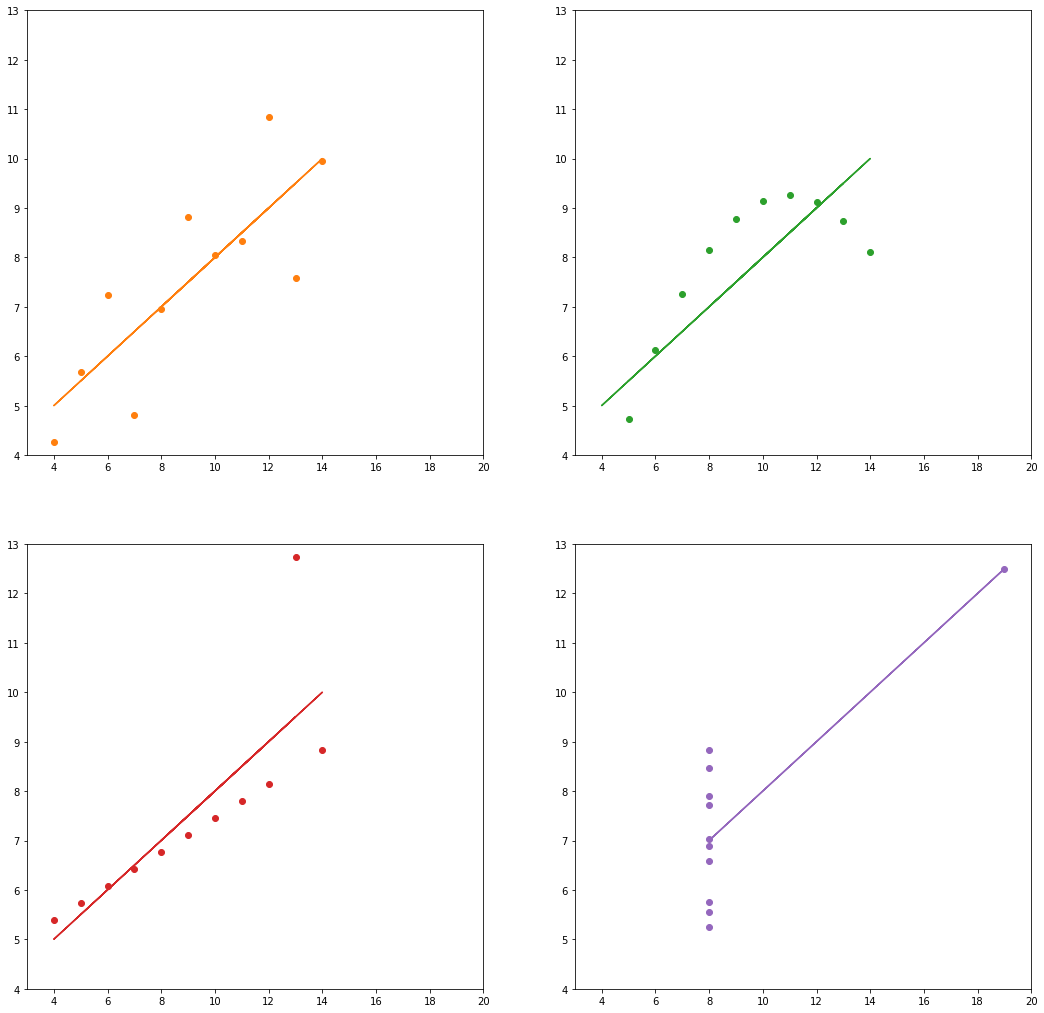

In [111]:
### Make them plots ###
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (18,18))
for i in range(1,5):
    fig.add_subplot(2,2,i)
    plt.xlim(3,20)
    plt.ylim(4,13)
    x,y = data[f"X{i}"], data[f"Y{i}"]
    a, b = regr_df["Slope"][f"Data{i}"], regr_df["Intercept"][f"Data{i}"] 
    plt.scatter(x,y, color = f"C{i}")
    plt.plot(x, x * a + b, color = f"C{i}")
plt.show()

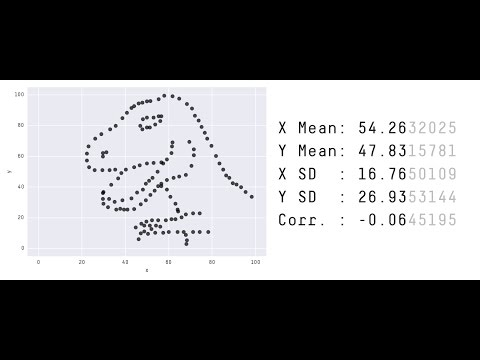

In [38]:
from IPython.display import YouTubeVideo
YouTubeVideo("DbJyPELmhJc",width=800, height=450)



## Prelude to Part 3: Some tips to make nicer figures.

Before even starting visualizing some cool data, I just want to give a few tips for making nice plots in matplotlib. Unless you are already a pro-visualizer, those should be pretty useful to make your plots look much nicer. 
Paying attention to details can make an incredible difference when we present our work to others.

> _Video Lecture_: [How to improve your plots](https://www.youtube.com/watch?v=sdszHGaP_ag)

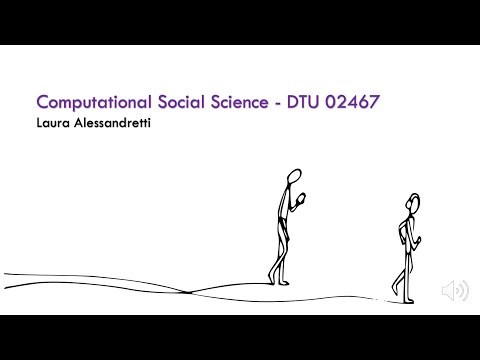

In [112]:
from IPython.display import YouTubeVideo
YouTubeVideo("sdszHGaP_ag",width=800, height=450)


## Part 3:  Time series of Reddit activity and market indicators.

It's really time to put into practice what we learnt by plotting some data! We will start by looking at the time series describing the number of comments about GME in wallstreetbets over time. We will try to see how that relates to the volume and price of GME over time, through some exploratory data visualization.

 We will use two datasets today: 
 * the _GME market data_, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 3. We will refer to this as the _comments dataset_.

> _Exercise 2 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html) to appreciate changes across orders of magnitude.
> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.
> 3. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

In [3]:
### Load GME Stock Data ###
import pandas as pd
GME = pd.read_csv("data/GME.csv", parse_dates = ["Date"]).set_index("Date")
GME_rolling = GME.rolling("7D").mean()


### Download Comments Data ###
comments = pd.read_csv("data/gme_reddit_comments.csv", parse_dates = ["creation_date"]).set_index("creation_date")
comments_daily = comments.resample("1D").count()
comments_rolling = comments_daily.rolling("7D").mean()


In [4]:
# Intitialise matplotlib
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as mdates

mpl.rcParams["font.family"] = "Cambria"
mpl.rcParams["lines.linewidth"] = 1

myFmt = mdates.DateFormatter("%b %Y")



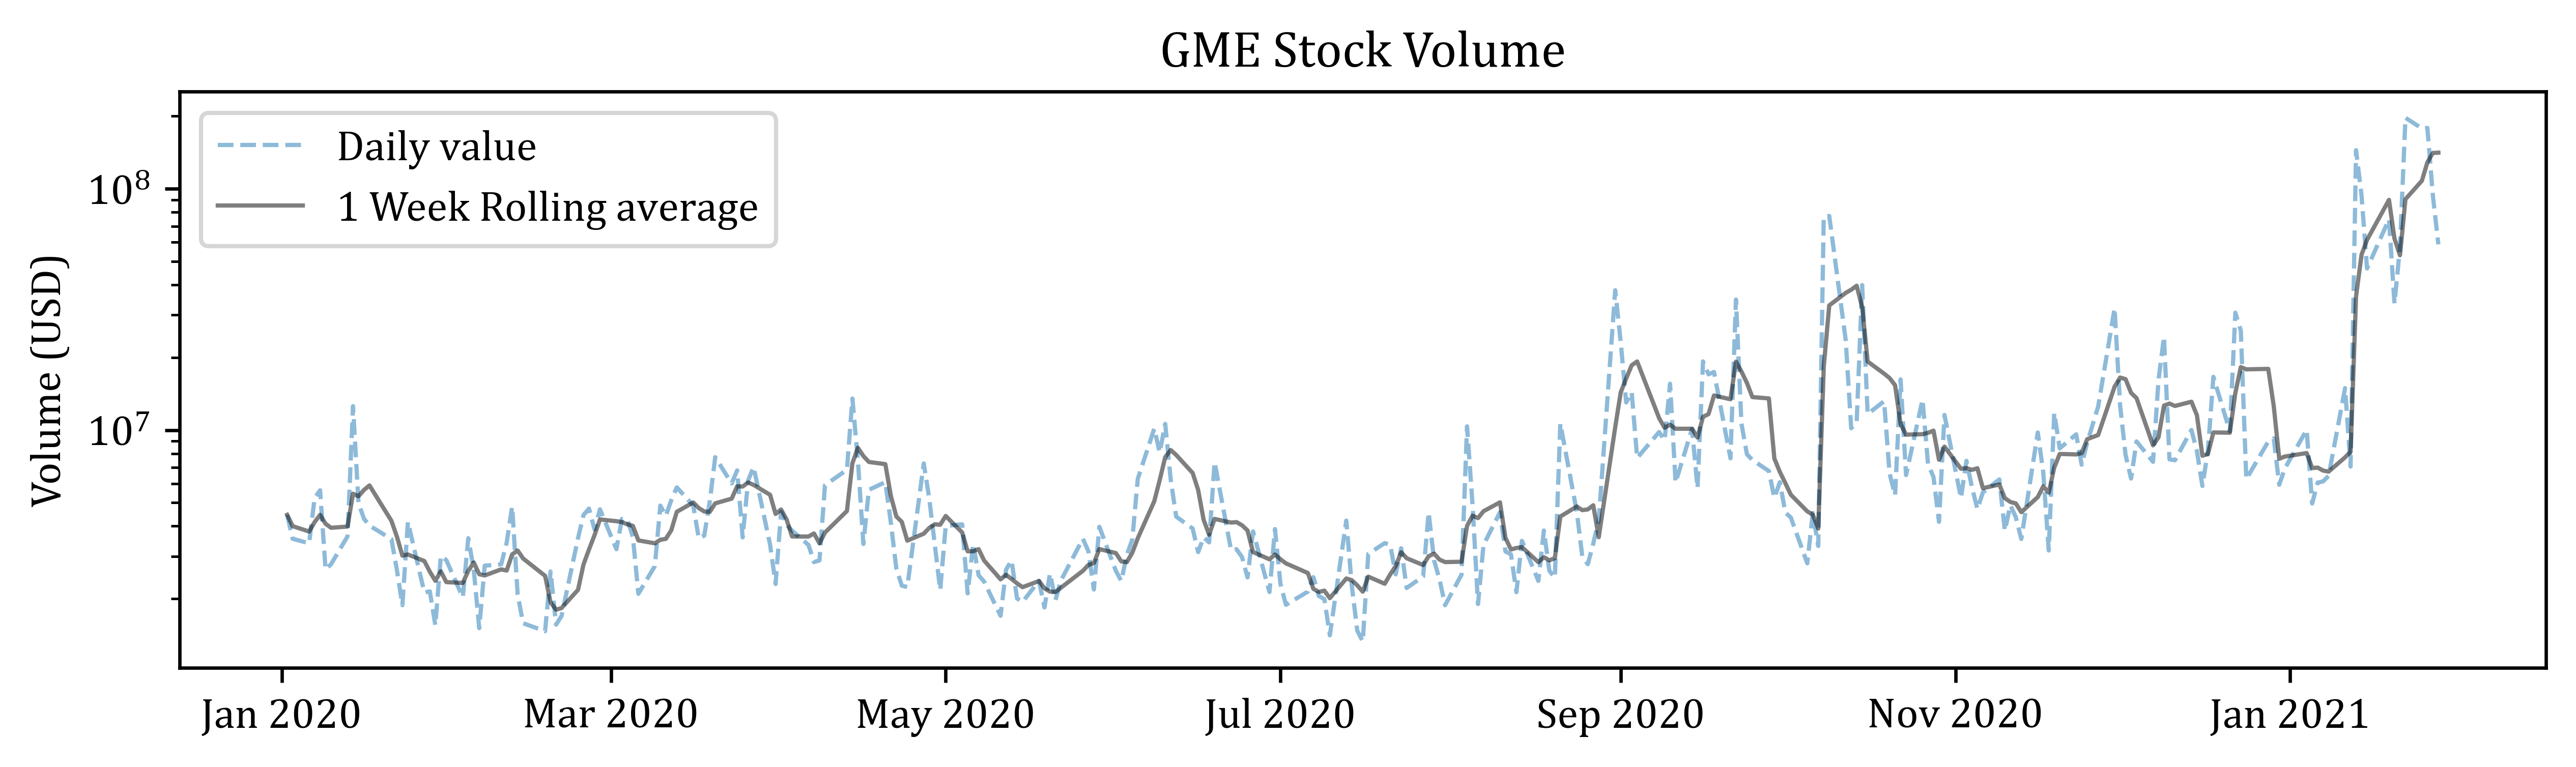

In [6]:
### Plot Daily Volume with 7 day rolling average ###

fig, ax = plt.subplots(figsize = (10,2.5), dpi = 600)
ax.plot(GME.index, GME.Volume, ls = "--", alpha = .5, label = "Daily value")
ax.plot(GME_rolling.index, GME_rolling.Volume, color ="k", alpha = .5, label = "1 Week Rolling average")
ax.set_yscale("log")
ax.set_ylabel("Volume (USD)")
ax.xaxis.set_major_formatter(myFmt)
ax.legend()
ax.title.set_text('GME Stock Volume')
plt.savefig("./test.png")

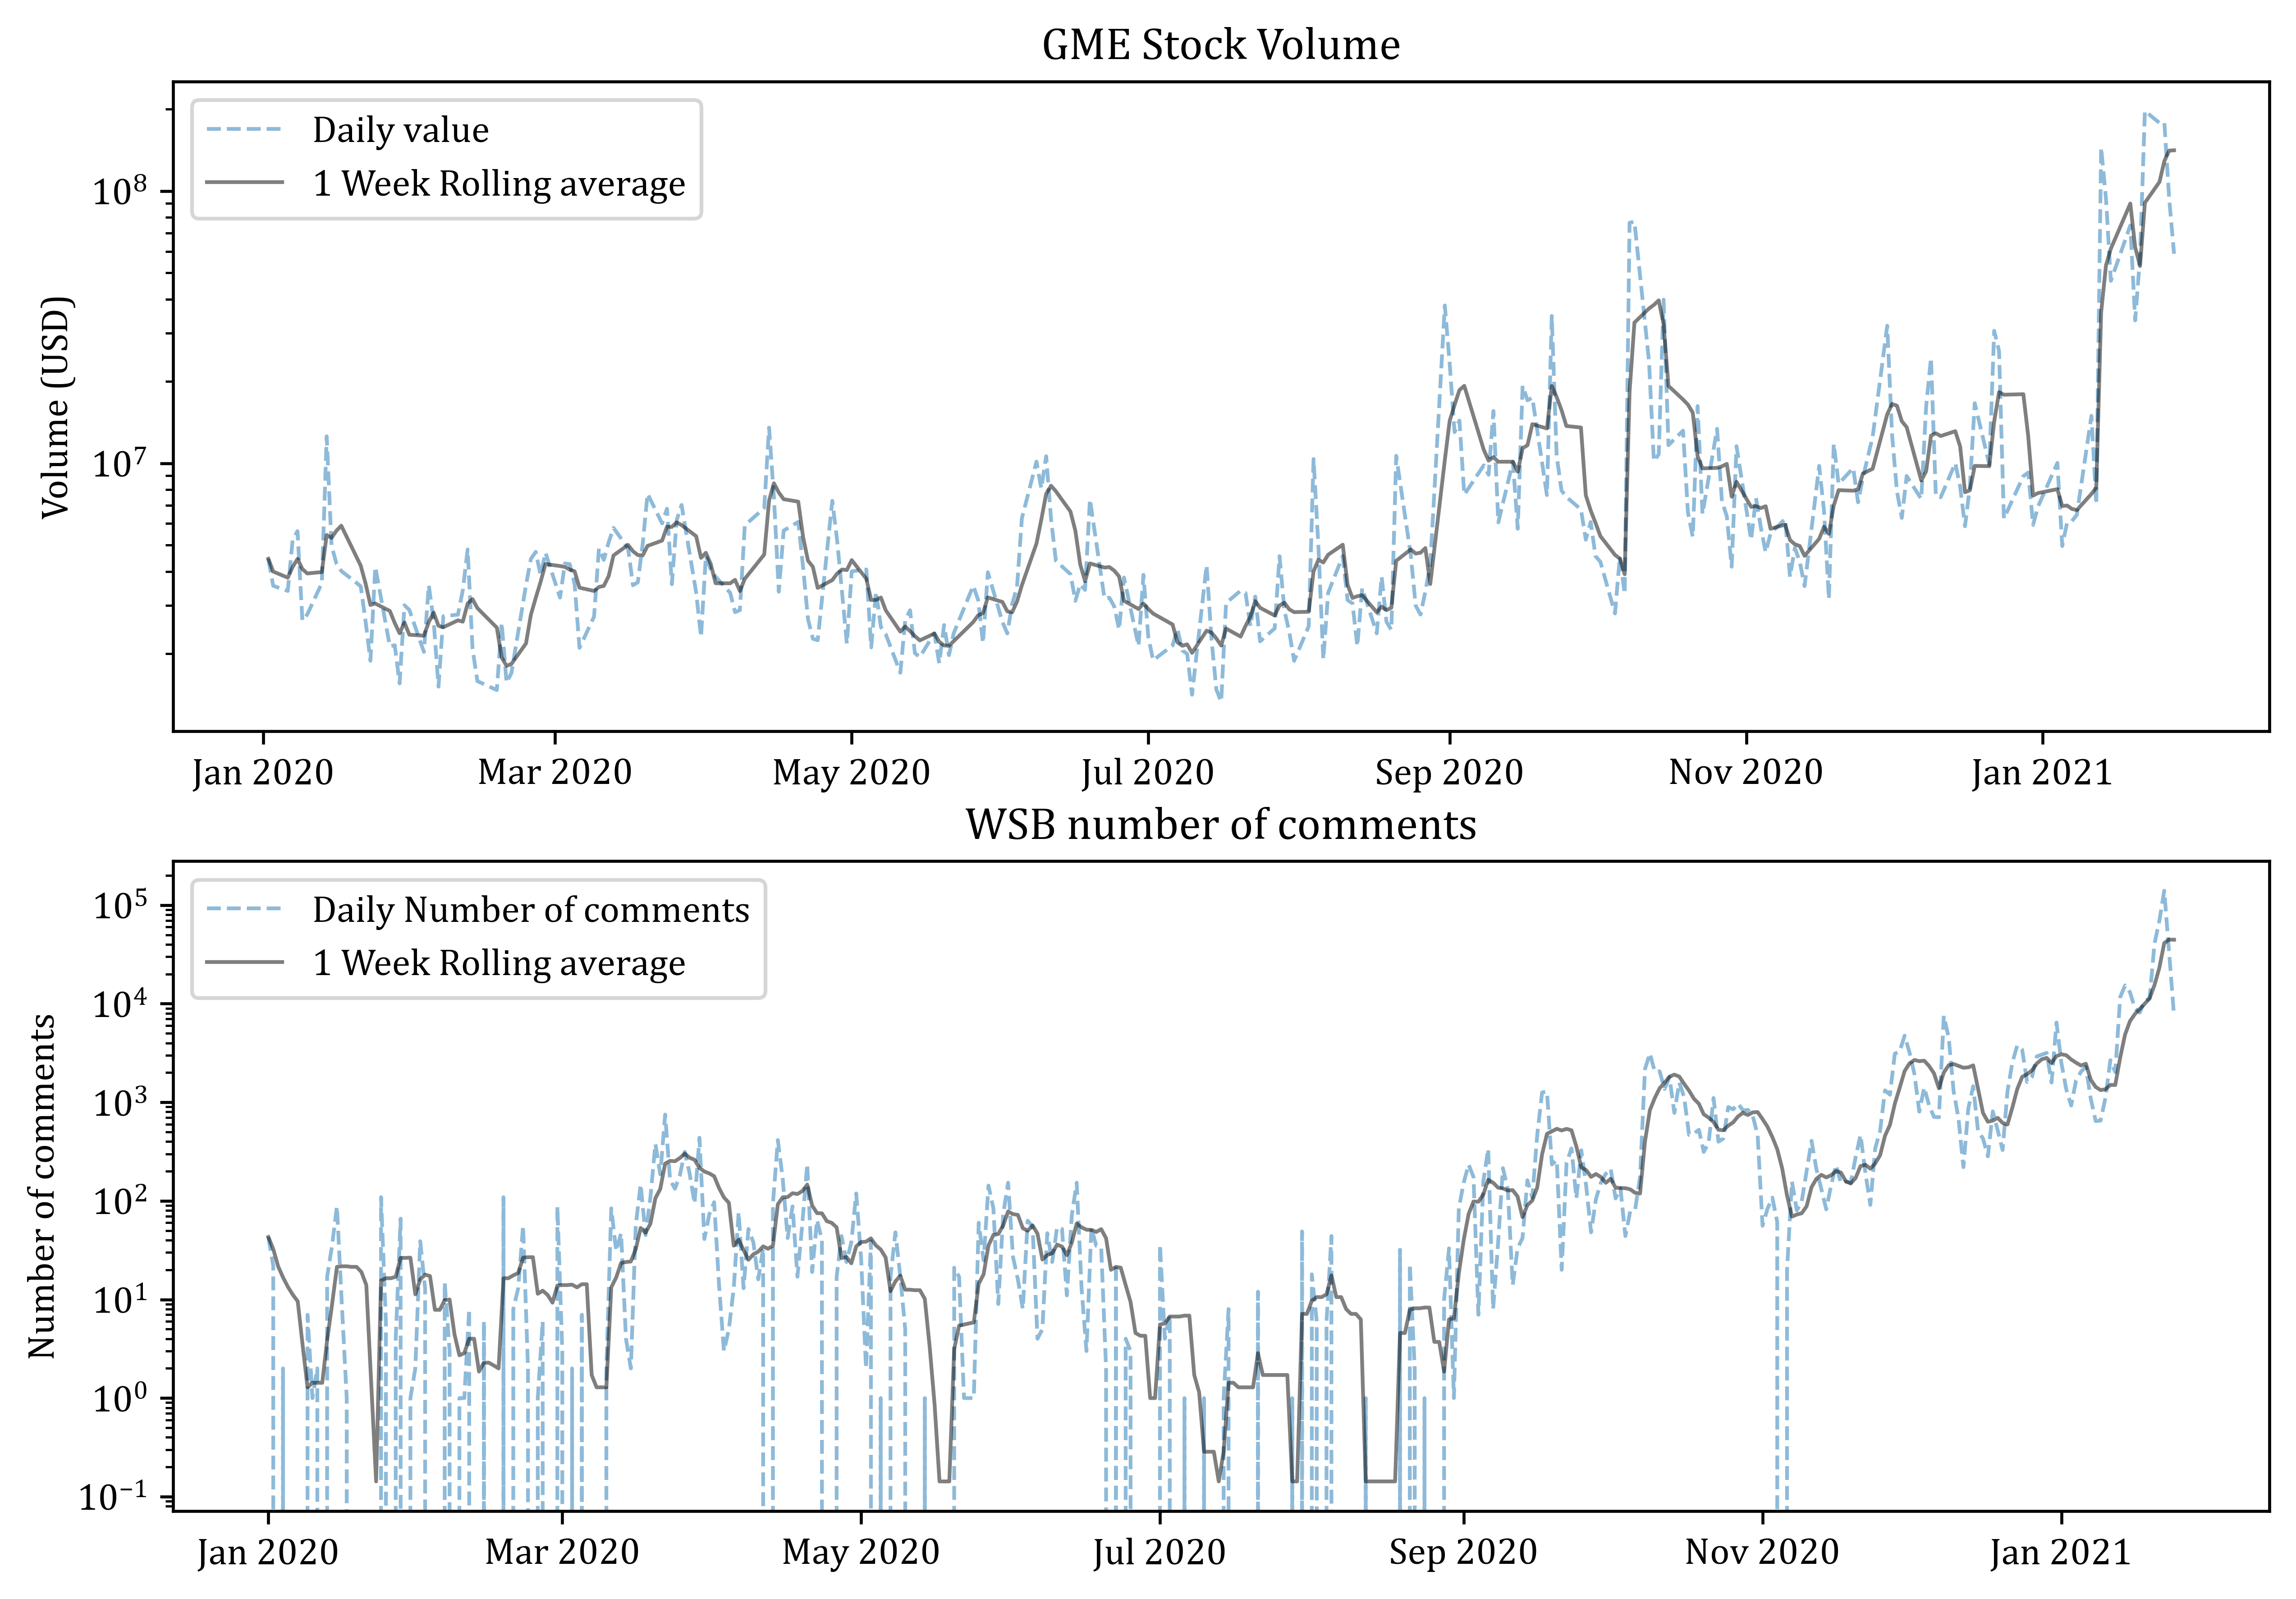

In [7]:
### Plot total number of comments ###


fig, ax = plt.subplots(2, figsize = (10,7), dpi = 600)


ax[0].plot(GME.index, GME.Volume, ls = "--", alpha = .5, label = "Daily value")
ax[0].plot(GME_rolling.index, GME_rolling.Volume, color ="k", alpha = .5, label = "1 Week Rolling average")
ax[0].set_yscale("log")
ax[0].set_ylabel("Volume (USD)")
ax[0].xaxis.set_major_formatter(myFmt)
ax[0].legend()
ax[0].title.set_text('GME Stock Volume')

ax[1].plot(comments_daily.index, comments_daily.id, ls = "--", alpha = .5, label = "Daily Number of comments")
ax[1].plot(comments_rolling.index, comments_rolling.id, color ="k", alpha = .5, label = "1 Week Rolling average")
ax[1].set_yscale("log")
ax[1].set_ylabel("Number of comments")
ax[1].xaxis.set_major_formatter(myFmt)
ax[1].legend()
ax[1].title.set_text('WSB number of comments')


plt.savefig("./test.png")

> _Exercise 3 : Returns vs number of submissions using scatter-plots_.
> In this exercise, we will look at the association between GME market indicators and the attention on Reddit. First, we will create the time-series of daily [returns](https://en.wikipedia.org/wiki/Price_return). Returns measure the  change in price given two given points in time (in our case we will focus on consecutive days). They really constitute the quantity of interest when it comes to stock time-series, because they tell us how much _money_ one would make if he/she bought the stock on a given day and sold it at a later time. For consistency, we will also compute returns (corresponding to daily changes) for the number of Reddit submissions over time.
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).
> 2. Compute the daily log-change in number of new submissions as  ``np.log(submissions(t)/submissions(t-1))`` where ``submissions(t)`` is the number of submissions on day t. 
> 3. Compute the [Pearson correlation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) between the series computed in step 1 and step 2 (note that you need to first remove days without any submissions from the time-series). Is the correlation statistically significant? 
> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of submission. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 
> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it?
> 6. _Bonus step (Optional)_: Repeat steps 2-5 using the total number of comments instead of the total number of submissions. Do you notice anything different?

In [120]:
### Compute log return (GME) and log change in number of comments ###
import numpy as np
df = pd.concat([GME.Close, comments_daily.id], axis = 1)[:-4].dropna()
df["Return"] = np.log(df.Close / df.Close.shift(1))
# df.id = np.log(df.id).replace(-np.inf, 0)

df.corr(method="pearson")


,Close,id,Return
Close,1.000000,0.706610,0.339638
id,0.706610,1.000000,0.326472
Return,0.339638,0.326472,1.000000


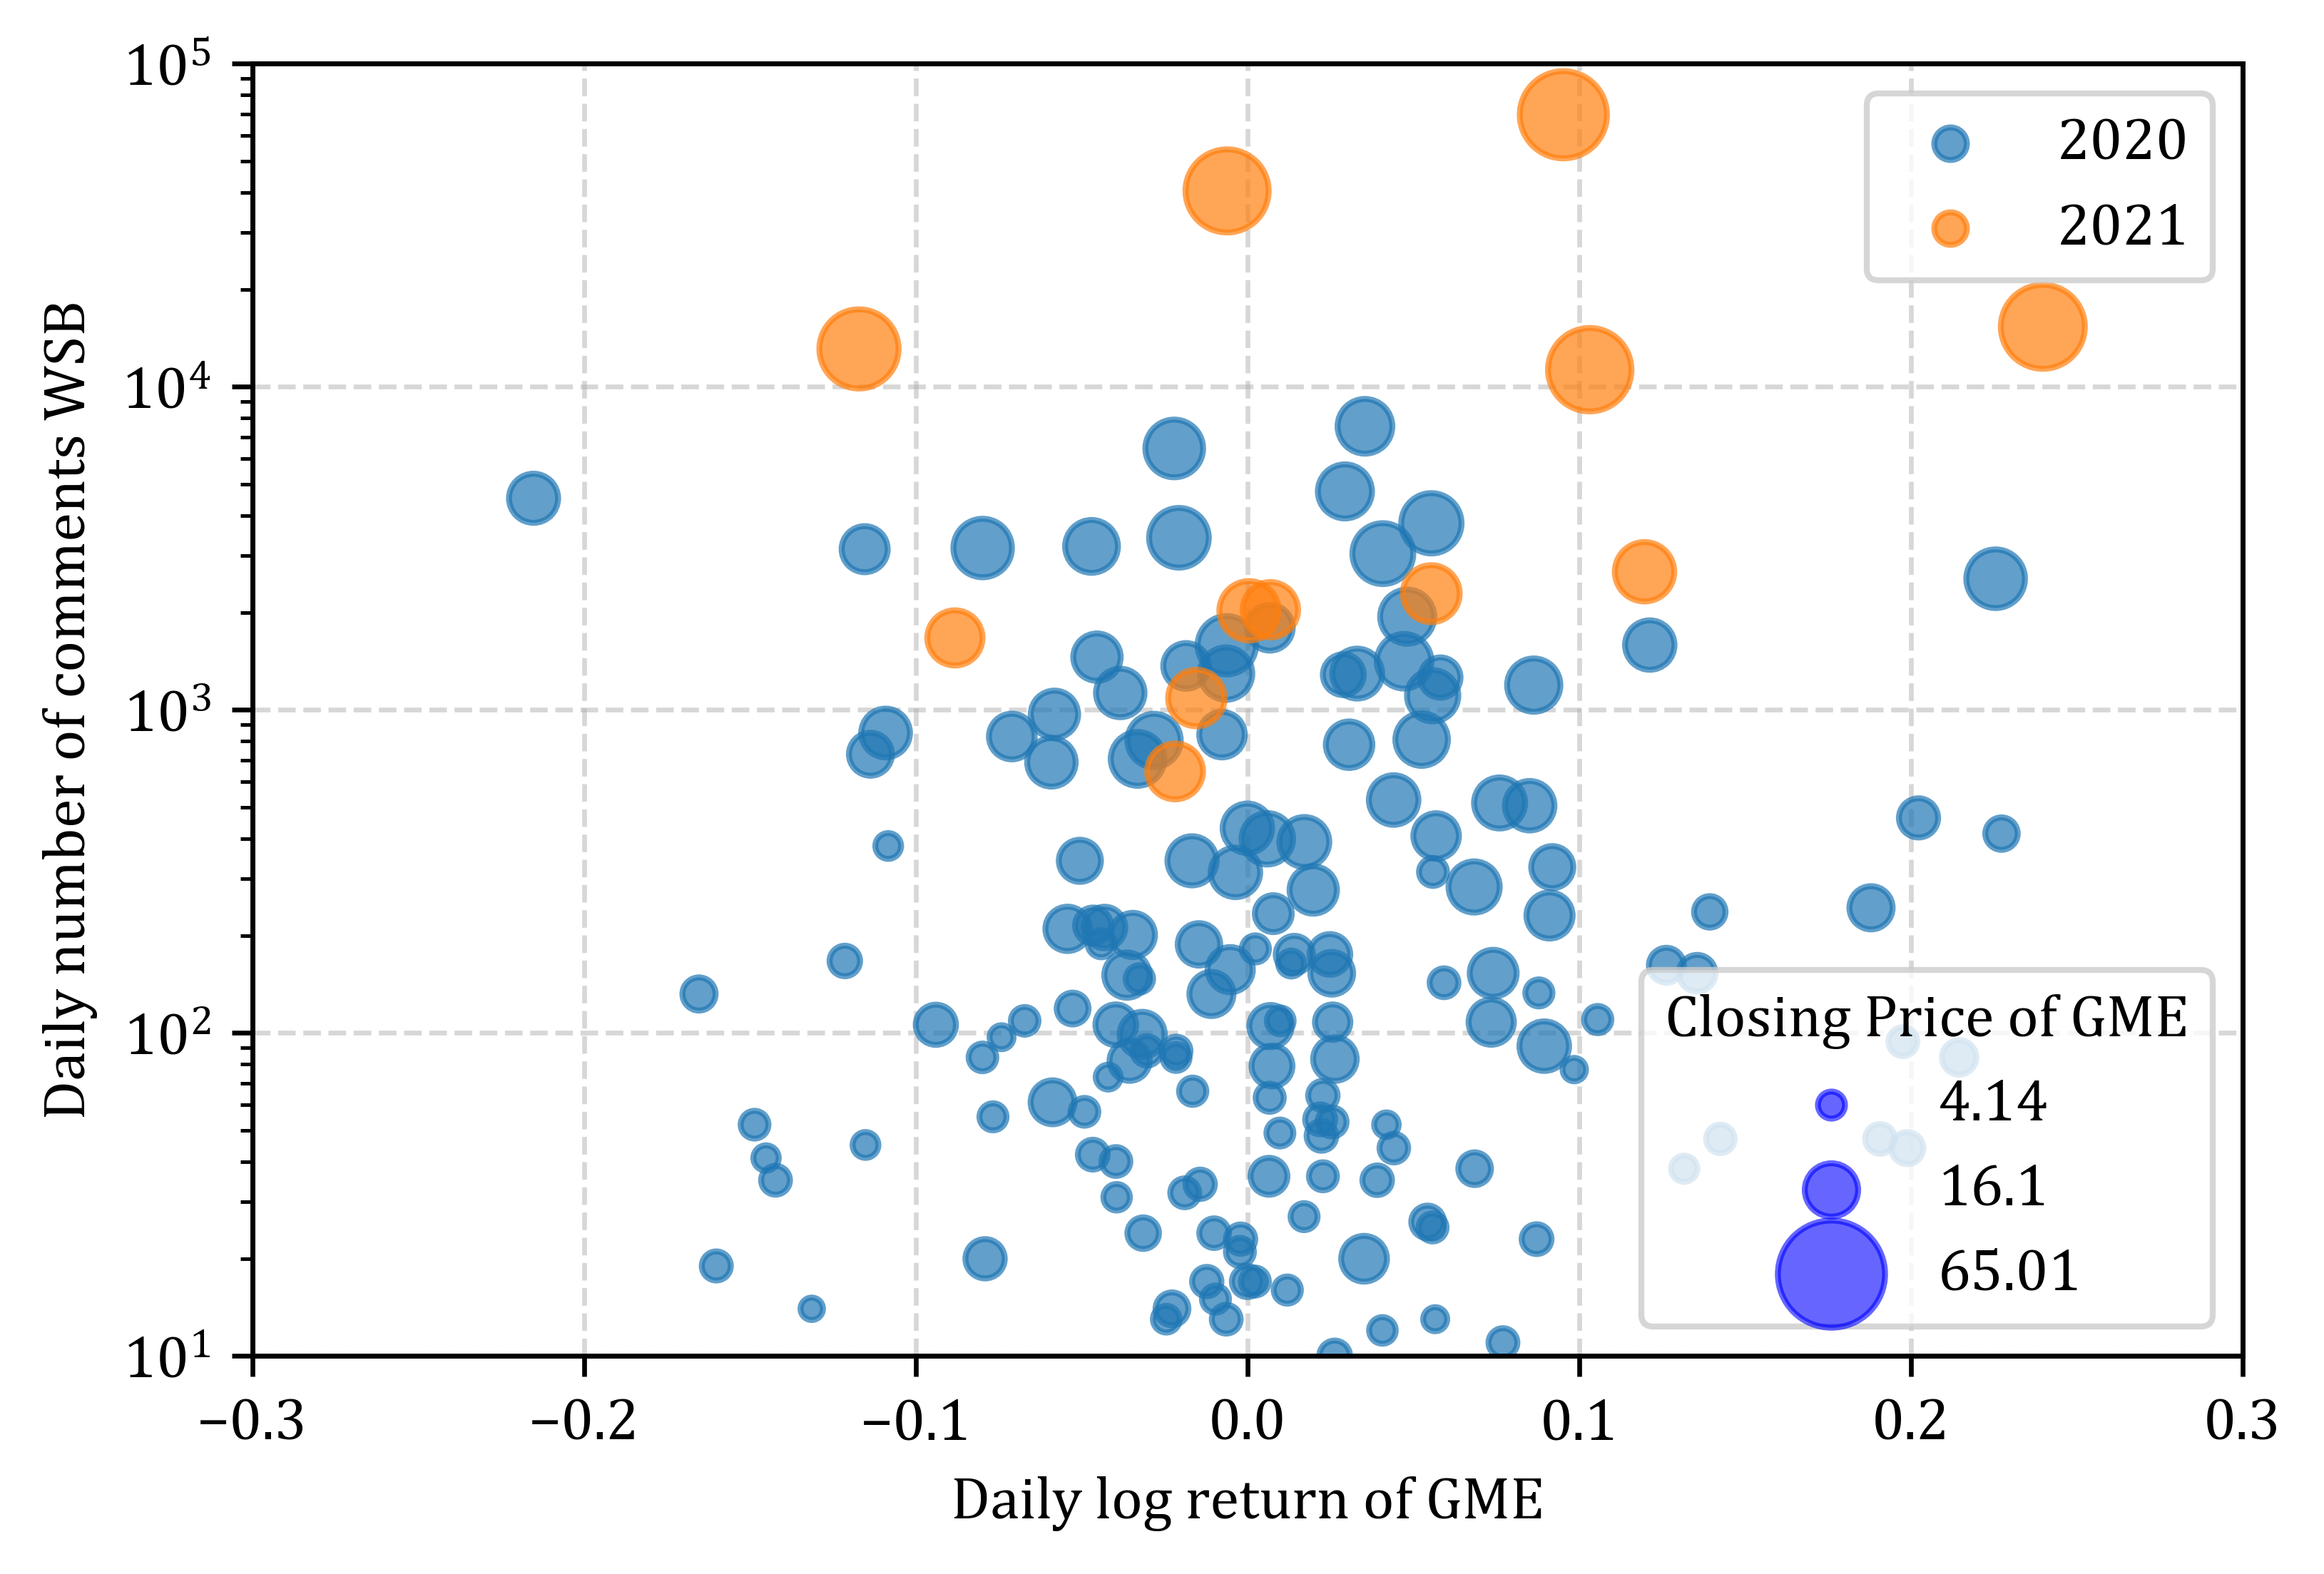

In [119]:
from datetime import datetime

fig, ax = plt.subplots( dpi = 600)
k = 5

ax.scatter(df.Return[df.index < datetime(2021,1,1)],
           df.id[df.index < datetime(2021,1,1)],
           s = df.Close[df.index < datetime(2021,1,1)] *k,
           label = "2020",
           alpha = .7,
           zorder = 3)

ax.scatter(df.Return[df.index > datetime(2021,1,1)],
           df.id[df.index > datetime(2021,1,1)],
           s = df.Close[df.index > datetime(2021,1,1)] *k,
           label = "2021",
           alpha = .7,
           zorder = 3)


ax.set_ylabel("Daily number of comments WSB")
ax.set_xlabel("Daily log return of GME")
ax.set_yscale("log")
legend1 = ax.legend()
legend1.legendHandles[0]._sizes = [30]
legend1.legendHandles[1]._sizes = [30]

ax.set_xlim(-0.3,0.3)
ax.set_ylim(bottom = 10^0,top=10**5, auto = False)
ax.grid(ls="--", alpha = .5)


ax2 = ax.twinx()
q = df.Close.quantile([0.2,.9,1]).values
ax2.scatter(np.NaN, np.NaN, label=str(q[0].round(2)), c='blue', s = q[0]*k, alpha = 0.6)
ax2.scatter(np.NaN, np.NaN, label=str(q[1].round(2)), c='blue', s = q[1]*k, alpha = 0.6)
ax2.scatter(np.NaN, np.NaN, label=str(q[2].round(2)), c='blue', s = q[2]*k, alpha = 0.6)
ax2.get_yaxis().set_visible(False)
ax2.set_ylim(bottom = 10^0,top=10**5, auto = False)
ax2.legend(title = "Closing Price of GME", loc = "lower right")



## Part 4 : The activity of Redditors

It is time to start looking at redditors activity. The [r/wallstreetbets]() subreddit has definitely become really popular in recent weeks. But probably many users only jumped on board recently, while only a few were discussing about investing on GME [for a long time](https://www.reddit.com/user/DeepFuckingValue/). Now, we wil look at the activity of redditors over time? How different are authors?

> _Video Lecture_: [plotting histograms in matplotlib.]()

> _Reading_: [Section 7 of the Data Visualization book](https://clauswilke.com/dataviz/histograms-density-plots.html)

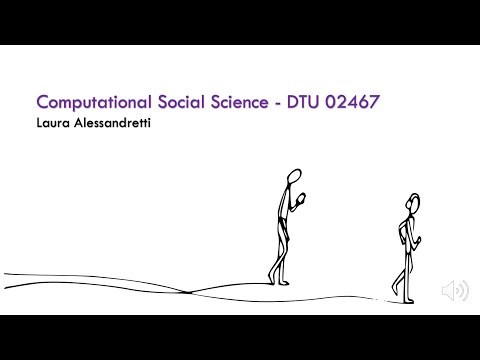

In [2]:

YouTubeVideo("UpwEsguMtY4",width=800, height=450)

> _Exercise 4: Authors overall activity_
> 1. Compute the total number of comments per author using the _comments dataset_. Then, make a histogram of the number of comments per author, using the function [``numpy.histogram``](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html), using logarithmic binning. Here are some important points on histograms (they should be already quite clear if you have watched the video above):
>     *  __Binning__: By default numpy makes 10 equally spaced bins, but you always have to customize the binning. The number and size of bins you choose for your histograms can completely change the visualization. If you use too few bins, the histogram doesn't portray well the data. If you have too many, you get a broken comb look. Unfortunately is no "best" number of bins, because different bin sizes can reveal different features of the data. Play a bit with the binning to find a suitable number of bins. Define a vector $\nu$ including the desired bins and then feed it as a parameter of numpy.histogram, by specifying _bins=\nu_ as an argument of the function. You always have at least two options:
>      * _Linear binning_: Use linear binning, when the data is not heavy tailed, by using ``np.linspace`` to define bins.
>      * _Logarithmic binning_: Use logarithmic binning, when the data is [heavy tailed](https://en.wikipedia.org/wiki/Fat-tailed_distribution), by using ``np.logspace`` to define your bins.
>     *  __Normalization__: To plot [probability densities](https://en.wikipedia.org/wiki/Probability_density_function), you can set the argument _density=True_ of the ``numpy.histogram`` function.
>
> 3. Compute the mean and the median value of the number of comments per author and plot them as vertical lines on top of your histogram. What do you observe? Which value do you think is more meaningful?

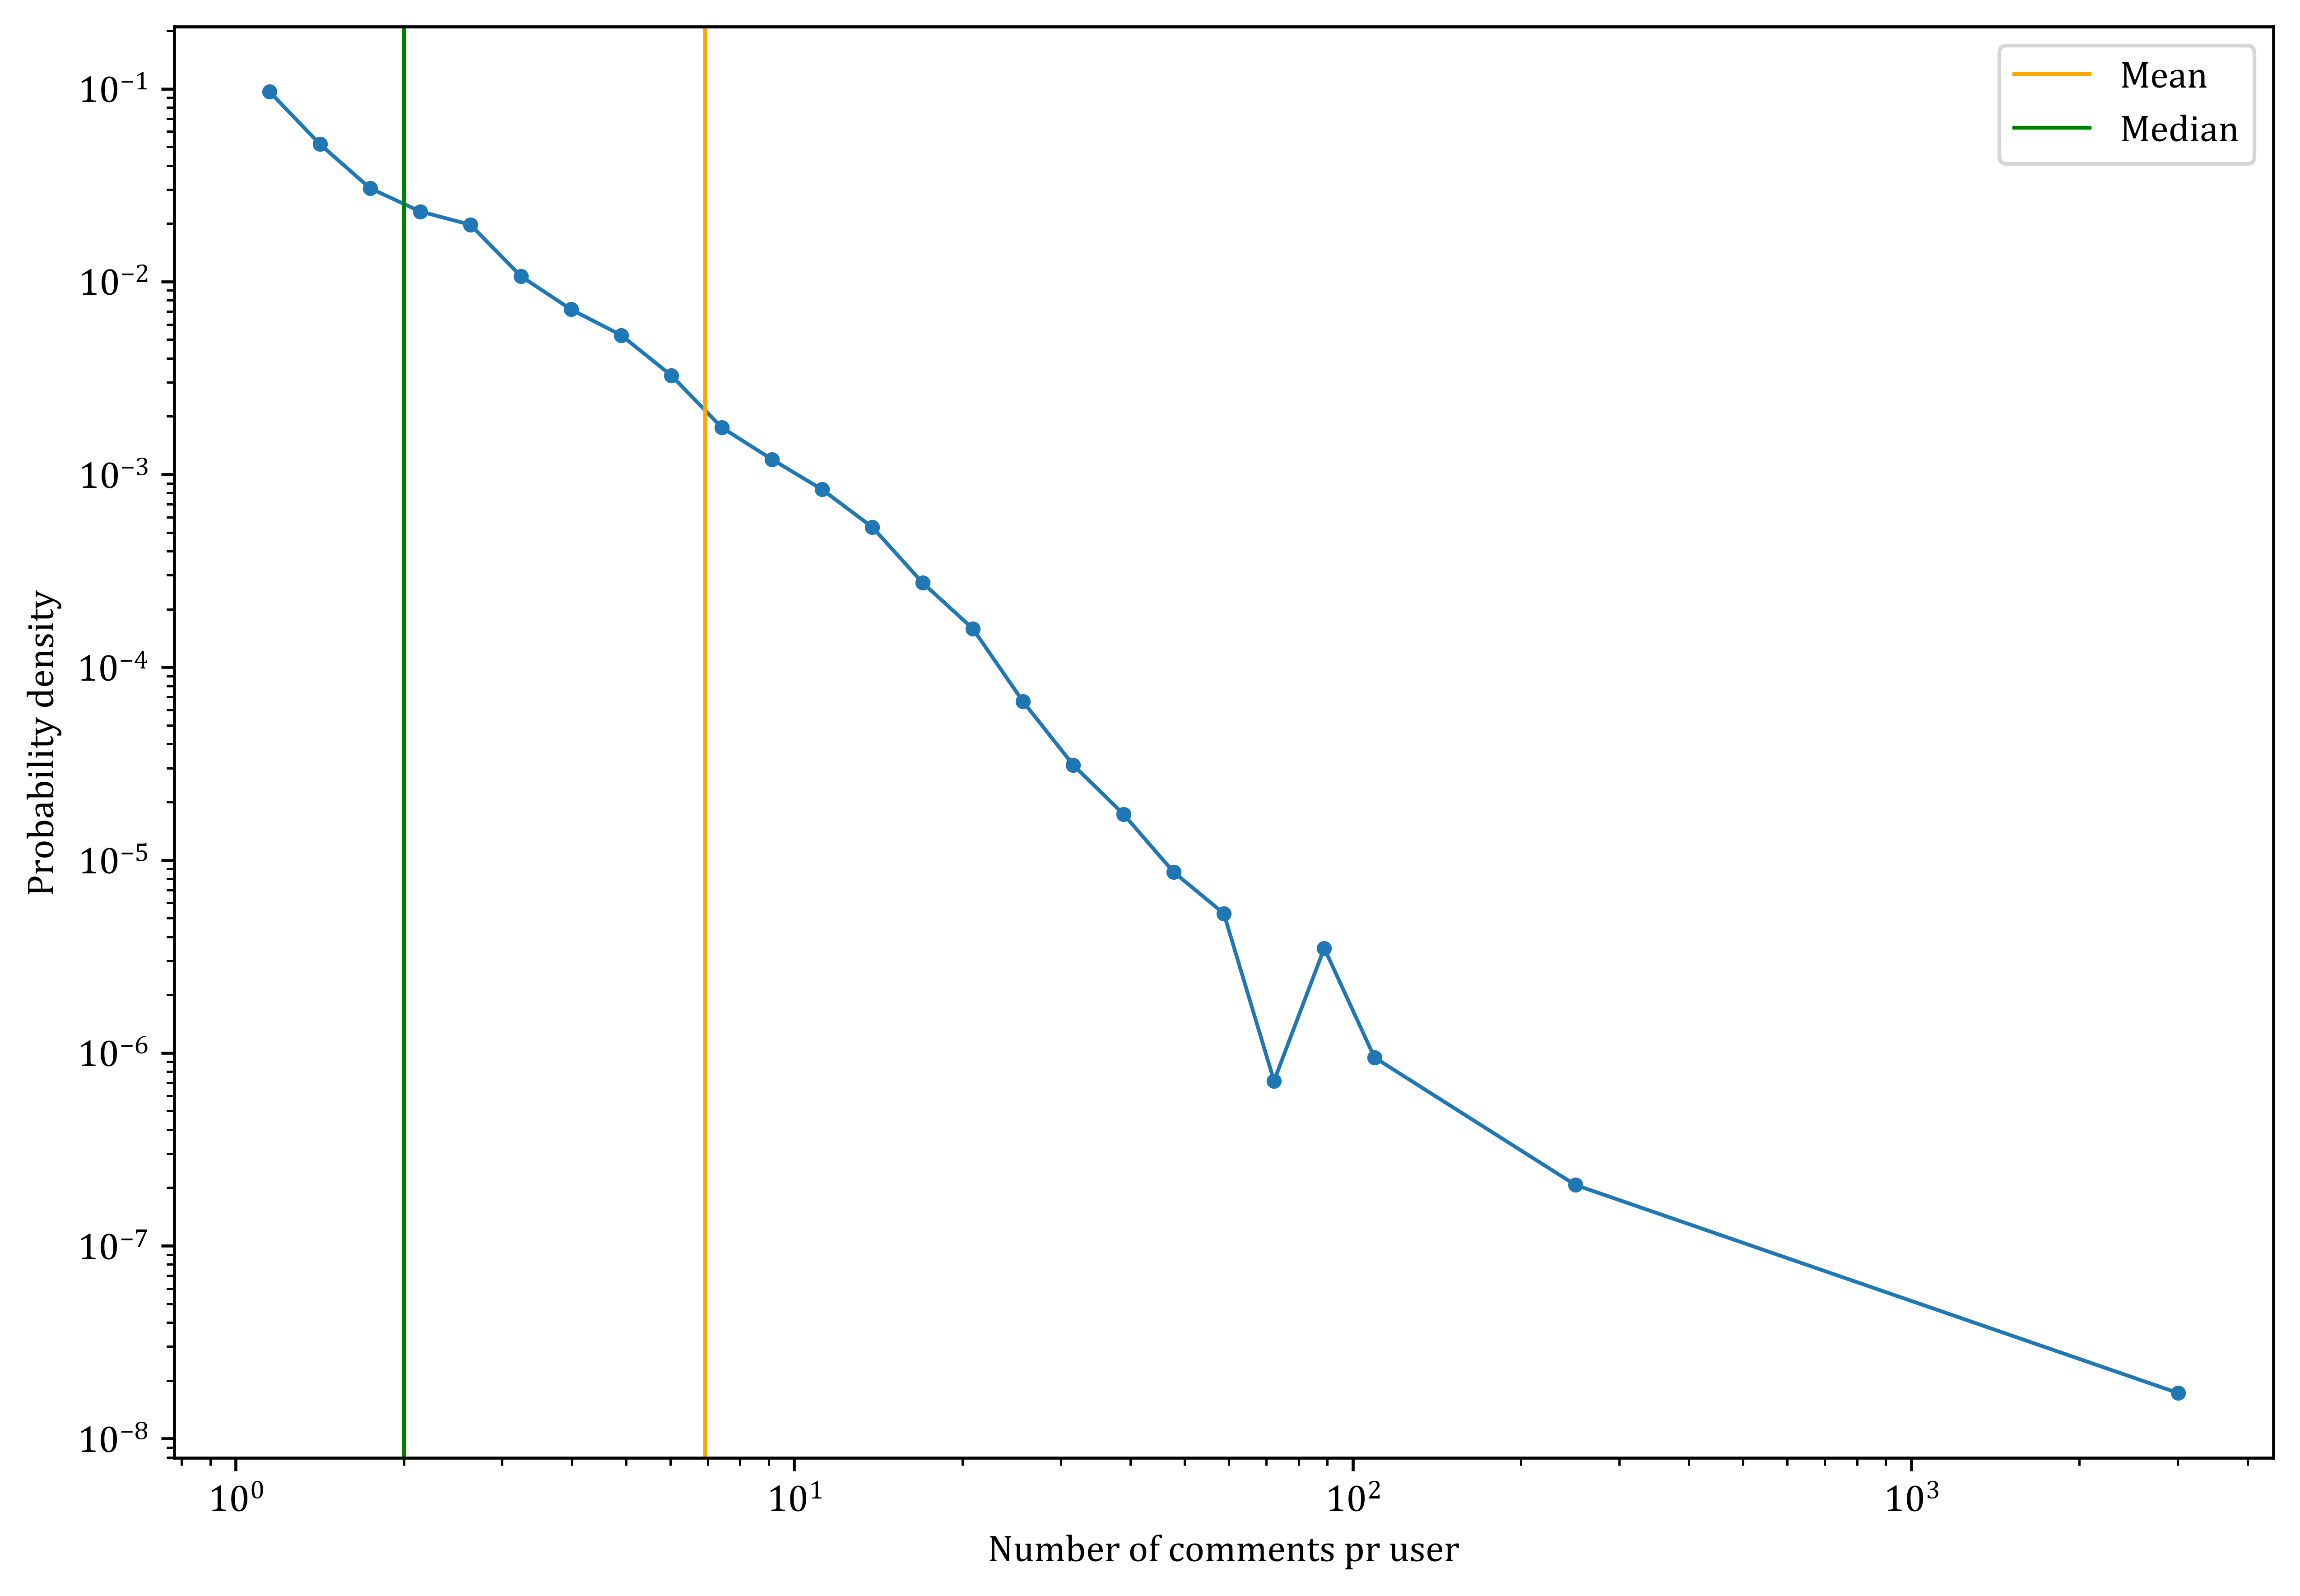

In [209]:
AC = comments.groupby("author").size().values
bins = np.logspace(min(AC), np.log10(max(AC)), 40)
hist, edges = np.histogram(AC, bins = bins, density = True)
x = (edges[1:] - edges[:-1])/2

xx, yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j >0])

fig, ax = plt.subplots(figsize = (10,7), dpi = 600)
ax.plot(xx,yy, marker = '.')
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Number of comments pr user")
ax.set_ylabel("Probability density")
ax.axvline(np.mean(AC), color = "orange", label = "Mean")
ax.axvline(np.median(AC), color = "green", label = "Median")
ax.legend()

> _Exercise 5: Authors lifespan_
>
> 1. For each author, find the time of publication of their first comment, _minTime_, and the time of publication of their last comment, _maxTime_, in [unix timestamp](https://www.unixtimestamp.com/). 
> 2. Compute the "lifespan" of authors as the difference between _maxTime_ and _minTime_. Note that timestamps are measured in seconds, but it is appropriate here to compute the lifespan in days. Make a histogram showing the distribution of lifespans, choosing appropriate binning. What do you observe?
> 3. Now, we will look at how many authors joined and abandoned the discussion on GME over time. First, use the numpy function [numpy.histogram2d](https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html) to create a 2-dimensional histogram for the two variables _minTime_ and _maxTime_. A 2D histogram, is nothing but a histogram where bins have two dimensions, as we look simultaneously at two variables. You need to specify two arrays of bins, one for the values along the x-axis (_minTime_) and the other for the values along the y-axis (_maxTime_). Choose bins with length 1 week.
> 4. Now, use the matplotlib function [``plt.imshow``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to visualize the 2d histogram. You can follow [this example](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) on StackOverflow. To show dates instead of unix timestamps in the x and y axes, use [``mdates.date2num``](https://matplotlib.org/api/dates_api.html#matplotlib.dates.date2num). More details in this [StackOverflow example](https://stackoverflow.com/questions/23139595/dates-in-the-xaxis-for-a-matplotlib-plot-with-imshow), see accepted answer.
> 5. Make sure that the colormap allows to well interpret the data, by passing ``norm=mpl.colors.LogNorm()`` as an argument to imshow. This will ensure that your colormap is log-scaled. Then, add a [colorbar](https://matplotlib.org/3.1.0/gallery/color/colorbar_basics.html) on the side of the figure, with the appropriate [colorbar label](https://matplotlib.org/3.1.1/api/colorbar_api.html#matplotlib.colorbar.ColorbarBase.set_label).
> 6. As usual :) Look at the figure, and write down three key observations.
